# 4. Training Models

In short, training a model includes finding the best parameters meaning the least error value. Some methods have closed form (analytic) solutions and some require optimization approaches that are iterative and random. The most common optimization method is **gradient descent** which has 3 different types:
1. **Batch GD**, using the whole data in each iteration
2. **Minibatch GD**, using part of the data in each iteration
3. **Stochastic GD**, using a single data point in each iteration.

Full iterations going through the whole dataset is called and **epoch**.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["figure.figsize"] = (5,5)
# plt.rcParams["figure.dpi"] = 80
plt.style.use('ggplot')


## 4.1 Linear Regression

Linear regression is the common name for *multivariable univariate* regression. It has multiple inputs and a single output. In formal terms,

$$  \hat{y} = h_{\theta}(\bf{x}) = \theta^{\intercal} \bf{x} + \theta_{0} = \boldsymbol{\tilde{\theta}} \cdot \bf{\tilde{x}} $$

indicates the target variable prediction. This is actually an affine function due to $\theta_{0}$ bias term. To train a model, we use loss (cost) function and it is generally different than performance metric of which used to evaluate the final model.

Using MSE as a cost function, solution is called normal equation:

$$ \boldsymbol{\hat{\theta}} = (\bf{X}^{\intercal} \bf{X})^{-1} \bf{X}^{\intercal} \bf{y} $$

[[3.86960027]
 [2.71697811]]


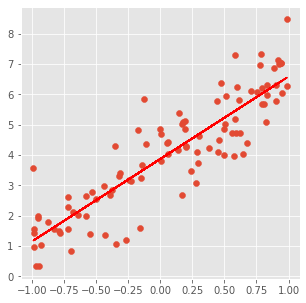

In [2]:
from scipy.linalg import inv, pinv

m = 100
X = 2 * np.random.rand(m,1) - 1
y = 4 + 3 * X + np.random.randn(m,1) # Random noise is added
X_aug = np.c_[np.ones((m,1)), X] # Augemented because bias 1 constants added
theta = inv(X_aug.T @ X_aug) @ X_aug.T @ y
preds = X_aug @ theta
index = np.argsort(X)
print(theta)
plt.scatter(X, y)
plt.plot(X, preds,"r-")
plt.show()

In [3]:
from sklearn.linear_model import LinearRegression

ln_reg = LinearRegression()
ln_reg.fit(X,y)
print(f"Bias {ln_reg.intercept_}\nCoefficients {ln_reg.coef_}\nTheta {theta}")

Bias [3.86960027]
Coefficients [[2.71697811]]
Theta [[3.86960027]
 [2.71697811]]


The matrix expression in normal equation is called pseudoinverse:

$$ \bf{X}^{\dagger} = (\bf{X}^{\intercal} \bf{X})^{-1} $$
$$ \hat{\boldsymbol{\theta}} = \bf{X}^{\dagger} \bf{y} $$ 

## 4.2 Gradient Descent

Gradient descent is based on minimizing a function through its derivative. In multivariable case, this becomes its gradient. It is an iterative algorithm such that

$$ \theta_{k+1} := \theta_{k} - \eta \nabla_{\theta} MSE(\theta) $$

gives the next parameter value for lower cost function. Learning rate is denoted with $\eta$.

In [4]:
# Batch gradient
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = (2/m) * X_aug.T @ (X_aug @ theta - y)
    theta = theta - eta * gradients
    
theta

array([[3.86960027],
       [2.71697811]])

In [5]:
# Stochastic gradient

eta = 0.1
n_iterations = 100000
m = 100
theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    sample_index = np.random.randint(m)
    gradients = X_aug[sample_index, :].reshape((-1, 1)) * (
        X_aug[sample_index, :] @ theta - y[sample_index]
    )
    theta = theta - eta * gradients
theta


array([[3.96986174],
       [2.37703404]])

## 4.3 Polynomial Regression

In polynomial regression, coefficients are still linear but features are transformed with polynomials. 

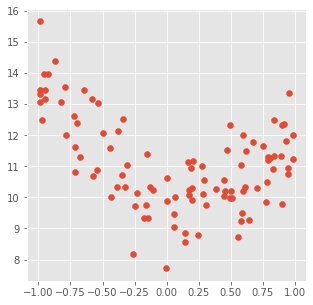

In [6]:
m, n = 100, 1
y_squ = 3 * X ** 2 - X + 10 + np.random.randn(m, n)
plt.scatter(X, y_squ)

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly,y_squ)
poly_reg.intercept_, poly_reg.coef_

(array([10.01770897]), array([[-1.00428063,  2.9709893 ]]))

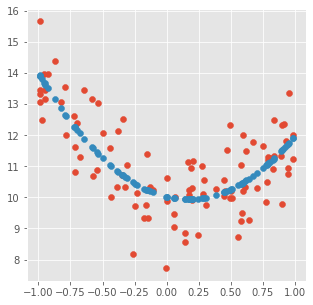

RMSE : 7.480394230537147
Mean, std y values: (11.082593522568912, 1.475343803018364)


In [8]:
from sklearn.metrics import mean_squared_error
preds = poly_reg.predict(X_poly)
plt.scatter(X,y_squ)
plt.scatter(X, preds)
plt.show()
print(f"RMSE : {np.sqrt(mean_squared_error(y,preds))}\nMean, std y values: {y_squ.mean(), y_squ.std()}")

## 4.4 Learning Curves

We use learning curves to determine underfitting and overfitting. By drawing training and evaluation error against sample size, model can be asses in terms of its capacity. After a certain sample size threshold, both errors start to converge in a value. 

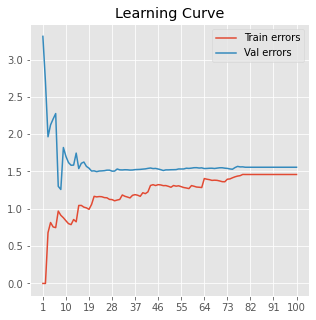

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = np.random.randn(m,1)
Y_squ = 2 * X**2 - X + np.random.randn(m,1)

X_train, X_test, y_train, y_test = train_test_split(X, y_squ, test_size=0.2)

train_errors, val_errors = [], []

for sample_size in range(1, m+1):
    
    ln_reg = LinearRegression()
    ln_reg.fit(X_train[:sample_size], y_train[:sample_size])
    train_preds = ln_reg.predict(X_train[:sample_size])
    train_errors.append(np.sqrt(mean_squared_error(y_train[:sample_size], train_preds)))
    
    test_preds = ln_reg.predict(X_test[:sample_size])
    val_errors.append(np.sqrt(mean_squared_error(y_test[:sample_size], test_preds)))
    
plt.plot(range(1,m+1), train_errors, label="Train errors")
plt.plot(range(1,m+1), val_errors, label="Val errors")
plt.xticks(range(1,m+1,9))
plt.title("Learning Curve")
plt.legend()
plt.show()

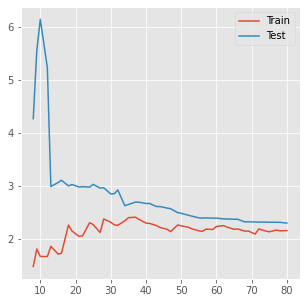

In [10]:
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures

X_poly_2 = PolynomialFeatures(degree=2).fit_transform(X)
ln_reg = LinearRegression()
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    ln_reg, 
    X_poly_2, 
    y_squ, 
    train_sizes=np.linspace(0.1, 1.0,50),
    scoring="neg_mean_squared_error",
    return_times=True)

plt.plot(train_sizes, np.mean(-train_scores,axis=1), label="Train")
plt.plot(train_sizes, np.mean(-test_scores,axis=1), label="Test")
plt.legend()
plt.show()

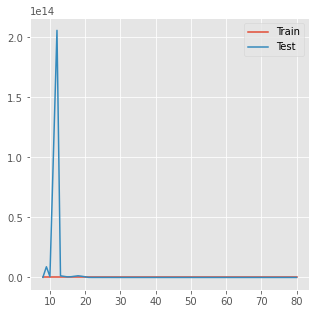

In [11]:
from sklearn.model_selection import learning_curve

X_poly_10 = PolynomialFeatures(degree=10).fit_transform(X)
ln_reg = LinearRegression()

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    ln_reg, 
    X_poly_10, 
    y_squ, 
    train_sizes=np.linspace(0.1, 1.0,50),
    scoring="neg_mean_squared_error",
    return_times=True)

plt.plot(train_sizes, np.mean(-train_scores,axis=1), label="Train")
plt.plot(train_sizes, np.mean(-test_scores,axis=1), label="Test")
plt.legend()
plt.show()

>**Bias:** This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.

>**Variance:** This part is due to the model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance and thus overfit the training data.

> **Irreducible error:** This part is due to the noisiness of the data itself. The only way to reduce this
part of the error is to clean up the data (e.g., fix the data sources, such as broken
sensors, or detect and remove outliers).

Increasing a model’s complexity will typically increase its variance and reduce its bias.
Conversely, reducing a model’s complexity increases its bias and reduces its variance.
This is why it is called a trade-off.

## 4.5 Regularized Linear Models

Regularization places constraints on the model such that overfitting does not occur. We can limit parameter possible values to implement regularization. For example, regarding a linear model $y = \theta x + b, x, b, \theta \in \mathbb{R}$ if $\theta$ can only have positive values then model can only predict positive relationships. 

Let's start with **ridge regression**

$$ J(\boldsymbol{\theta}) = MSE(\boldsymbol{\theta}) + \alpha \|\boldsymbol{\theta}\|_{2}^{2} $$

and by adding $l_{2}$ norm of parameters to the error function, we can limit possible values. Closed form solution is

$$ \boldsymbol{\theta} = (\bf{X}^{\intercal} \bf{X} + \alpha I)^{-1} \bf{X}^{\intercal} \bf{y} $$

and `Ridge` method accepts different solvers such as `svd`, `cholesky` `sag` etc.

In [12]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

rdg_reg = Ridge(alpha=1.0, solver="cholesky") # Closed form solution
rdg_reg.fit(X_poly_2,y_squ)
preds = rdg_reg.predict(X_poly_2)

print(f"Ridge RMSE: {np.sqrt(mean_squared_error(y_squ, preds))}")

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X_poly_2,y_squ.ravel())
preds = sgd_reg.predict(X_poly_2)

print(f"SGD RMSE: {np.sqrt(mean_squared_error(y_squ, preds))}")

Ridge RMSE: 1.4746504795849336
SGD RMSE: 1.4753420116248805


Second regularized linear model is **Lasso**

$$ J(\boldsymbol{\theta}) = MSE(\boldsymbol{\theta}) + \alpha \|\boldsymbol{\theta}\|_{1} $$


In [13]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
print(lasso_reg.predict([[1.5]]))

from sklearn.linear_model import SGDRegressor

sgd_las = SGDRegressor(penalty="l1")
sgd_las.fit(X,y.ravel())
(sgd_las.predict([[1.5]]))

[4.04949135]


array([3.86883318])

Finally, the last regularized linear model is **elastic net** which combines previous approaches

$$ J(\boldsymbol{\theta}) = MSE(\boldsymbol{\theta}) + r \alpha \|\boldsymbol{\theta}\|_{2}^{2} + (1 - r) \alpha \|\boldsymbol{\theta}\|_{1} $$

and it is a middle ground. Preferring elastic net over Lasso is reasonable when features are strongly correlated and number of features are greater than sample size.


In [14]:
from sklearn.linear_model import ElasticNet

ela_rg = ElasticNet(alpha=0.1, l1_ratio=0.5)
ela_rg.fit(X,y)
ela_rg.predict([[1.5]])

from sklearn.linear_model import SGDRegressor

ela_rg = SGDRegressor(penalty="elasticnet")
ela_rg.fit(X,y.ravel())
ela_rg.predict([[1.5]])

array([3.87283365])

Another regularization method is **early stopping**. This method uses validation error performance instead of model parameters. We sort of use a memoization for validation errors and stop the training moment validation errors start to increase. 

In [15]:
from sklearn.base import clone
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

m, n = 10_000, 1
X = 2 * np.random.randn(m,n)
y = 3 * X**2 - 3*X + np.random.randn(m, n)

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True, 
    random_state=10)

poly_pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("scaler", StandardScaler())
])

X_train_poly = poly_pipeline.fit_transform(X_train)
X_test_poly = poly_pipeline.transform(X_test)

sgd_reg = SGDRegressor(
    max_iter=1,
    tol=-np.infty,
    warm_start=True,
    penalty=None,
    learning_rate="constant",
    eta0=0.0005)

minimum_val_error = np.infty
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly, y_train.ravel())
    preds = sgd_reg.predict(X_test_poly)
    val_error = mean_squared_error(y_test, preds)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

## 4.6 Logistic Regression

As opposed to the name, logistic regression is a classification algorithm. The prediction scores generated by regression process is fed to logit function which at the end outputs values between 0 and 1. This range makes it possible to interpret scores as probabilities and a threshold can be used for deciding class label.

Mathematical prediction formula is

$$ \hat{p} = h_{\theta}(\bf{x}) = \sigma(\bf{x}^{\intercal} \theta) $$

and logistic function is 

$$ \sigma(t) = \frac{1}{1 + \exp(-t)} $$

and **score** $\sigma(t) = \hat{p}$ used as a probability. Another namingfor $t$ is logit because if score plugged into the logit function $ logit(p) = \log\frac{p}{1-p}$, the result is equal to $t$ such that $logit(\hat{p}) = t$.

Finally, model is trained according to **log-loss** which is 

$$ J(\boldsymbol{\theta}) = - \sum_{i=1}^{m} y^{(i)} log(\hat{p}) + (1 - y^{(i)}) log(1 - \hat{p}) $$

and sadly has no closed form solution. In addition, logistic regression is inherently a binary classifier. It's clear from the loss function, $y \in \{0,1\}$.

Let's use `iris` dataset for an example and turn it into a binary classification.

In [30]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

iris = load_iris()
X = iris["data"][:, 3:]
y = iris["target"]
y_2 = (y == 2).astype(np.int)

log_reg = LogisticRegression(solver="saga", multi_class="ovr")

X_proc = StandardScaler().fit_transform(X)
log_reg.fit(X_proc, y_2)
preds = log_reg.predict(X_proc)
score = f1_score(y_2, preds)
print(f"f1 score: {score}")


f1 score: 0.9387755102040817


When a dataset with multiclass labels is given to logistic regression, `sklearn` automatically runs one-vs-all classification. However, we can generalize the model using softmax function such as

$$ \sigma(\mathbf{x}) = \begin{bmatrix} \frac{e^{\boldsymbol{\theta}^{\intercal}_{1}\mathbf{x}}}{\sum_{i=1}^{k} e^{\boldsymbol{\theta}^{\intercal}\mathbf{x}}} \\ \vdots \\ \frac{e^{\boldsymbol{\theta}^{\intercal}_{k}\mathbf{x}}}{\sum_{i=1}^{k} e^{\boldsymbol{\theta}^{\intercal}\mathbf{x}}} \end{bmatrix} = \begin{bmatrix} \hat{p_{1}} \\ \vdots \\ \hat{p_{k}}\end{bmatrix}$$

and for every class we need a different parameter vector $\theta_{k}$. In order to train this model, we use **cross entropy** as a loss function meaning

$$ J(\boldsymbol{\theta}) = - \frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_{k}^{(i)} log(\hat{p}_{k}^{(i)}) $$

In [24]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris["data"]
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

scaler = StandardScaler()
X_train_proc = scaler.fit_transform(X_train)
x_test_proc = scaler.transform(X_test)

log_reg = LogisticRegression(multi_class="multinomial")
log_reg.fit(X_train_proc, y_train)

scores = log_reg.predict(x_test_proc)

print(f1_score(y_test, scores, average="micro"))


0.9333333333333333


> **Remark:** Entropy is the average amount of information we glean from the outcome of a random variable. Mathematical formulation is as follows for a r.v. $X \sim p(x) $
> $$ H[X] = - \sum_{x} p(x) log_{2}p(x) $$
> and this is for bit information. In addition, cross entropy is for estimating distribution wrongly as $q(x)$
> $$ H[p,q] = - \sum_{x} p(x) log_{2}q(x) $$
> If we rearange cross entropy, the extra added bits are obvious for miscalculating the distribution
> $$ H[p,q] = - \sum_{x} p(x) log_{2}p(x) - \sum_{x} p(x) log_{2}\frac{q(x)}{p(x)} $$
> $$ H[p,q] = \underbrace{H[X]}_{{Entropy}} + \underbrace{D_{KL}(p \| q)}_{KL~divergence} $$
